In [0]:

import pandas

In [0]:
!pip install vtk

     |████████████████████████████████| 48.9MB 46.3MB/s 


In [0]:
import vtk
from vtk.util import numpy_support
import os
import numpy
from matplotlib import pyplot, cm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
get_ipython().system_raw("unrar x DATATA.rar")

In [0]:
PathDicom = "DATATA/TCGA-VS-A8EB/05-05-2004-RESSONANCIA MAGNETICA DE ABDOME INFERIOR-20151/301-AXI T2 ssSH 5MM-79572"
reader = vtk.vtkDICOMImageReader()
reader.SetDirectoryName(PathDicom)
reader.Update()

In [0]:
!pip install pydicom

     |████████████████████████████████| 7.0MB 2.0MB/s 


In [0]:
import pydicom as dicom
ds = dicom.dcmread("DATATA/TCGA-VS-A8EB/05-05-2004-RESSONANCIA MAGNETICA DE ABDOME INFERIOR-20151/101-SURVEY-41266/000001.dcm")
print("PatientName" in ds)
patient_name = ds.data_element("PatientName")
patient_name_tag = patient_name.tag
patient_name_VR = patient_name.VR
patient_name_VM = patient_name.VM
patient_name_value = patient_name.value
pixel_bytes = ds.PixelData
pixel_array_numpy = ds.pixel_array  
dimensions = ds.pixel_array.shape
for n, val in enumerate(ds.pixel_array.flat):
    if val < 300:
        ds.pixel_array.flat[n] = 0
ds.PixelData = ds.pixel_array.tostring()
ds.save_as("00000001_new.dcm")

True


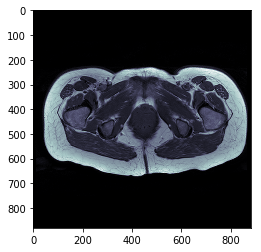

In [0]:
import matplotlib.pyplot as plt
import pydicom
ds = dicom.dcmread("DATATA/TCGA-VS-A8EB/05-05-2004-RESSONANCIA MAGNETICA DE ABDOME INFERIOR-20151/501-AXI T1 5mm-10492/000003.dcm")

plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

In [0]:
from datetime import datetime

print('The image is '+str(ds.Rows)+'x'+str(ds.Columns)+' pixels')
print('The image was encoded with '+str(ds.BitsStored)+' bits ')
print('The manufacturer is '+str(ds.Manufacturer)+' and the model is '+str(ds.ManufacturerModelName))
d=datetime.strptime(ds.AcquisitionDate,'%Y%m%d')
print('The image was made on '+str(d.date()))
print('The anatomy imaged is '+str(ds.BodyPartExamined))
if ds.PatientSex=='F':
    print('The patient imaged is Female')
else:
    print('The patient imaged is Male')

The image is 256x256 pixels
The image was encoded with 12 bits 
The manufacturer is Philips Medical Systems and the model is Achieva
The image was made on 2004-05-05
The anatomy imaged is CERVIX
The patient imaged is Female


In [0]:
print(ds)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
(0008, 0012) Instance Creation Date              DA: '20040505'
(0008, 0013) Instance Creation Time              TM: '071614'
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.14519.5.2.1.6354.4022.627285559940938961717598727424
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.6354.4022.655385138087472089290394549850
(0008, 0020) Study Date                          DA: '20040505'
(0008, 0021) Series Date                         DA: '20040505'
(0008, 0022) Acquisition Date                    DA: '20040505'
(0008, 0023) Content Date                        DA: '20040505'
(0008, 0030) Study Time                          TM: '071057'
(0008, 0031) Series Time                         TM: '071526.87000'
(0008, 0032) Acqui

In [0]:
print("PatientName" in ds)

True


[0, 255, 0, 255]

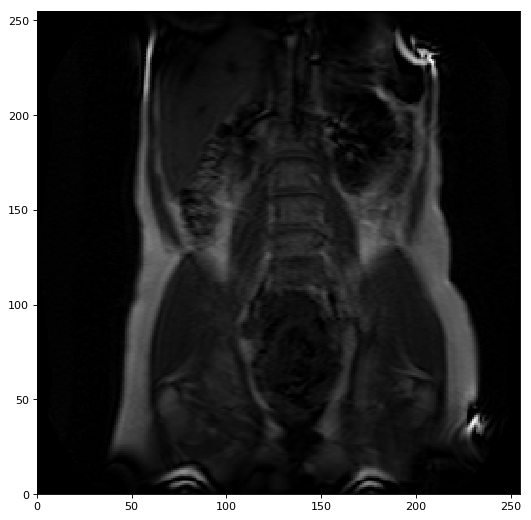

In [0]:
c = (int(ds.Rows), int(ds.Columns))
ArrayDicom = np.zeros(c, dtype=ds.pixel_array.dtype)
ArrayDicom[:,:]=ds.pixel_array
fig=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='b')
plt.axes().set_aspect('equal')
plt.set_cmap(plt.gray())
Rows=np.arange(ds.Rows)
Columns=np.arange(ds.Columns)
plt.pcolormesh(Rows, Columns, np.flipud(ArrayDicom[:, :]))
plt.axis([Rows.min(),Rows.max(),Columns.min(),Columns.max()])

In [0]:
!pip install pypng

     |████████████████████████████████| 296kB 3.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/a4/cd/54/c1d0803dfed5adf2bba530eda161581d9096d0154aee082cac
Successfully built pypng


In [0]:

import png 
import os, pydicom

source_folder = r'DATATA/TCGA-VS-A8EB/05-05-2004-RESSONANCIA MAGNETICA DE ABDOME INFERIOR-20151/501-AXI T1 5mm-10492'
output_folder = r'DATATA'


def dicom2png(source_folder, output_folder):
    list_of_files = os.listdir(source_folder)
    for file in list_of_files:
        try:
            ds = pydicom.dcmread(os.path.join(source_folder,file))
            shape = ds.pixel_array.shape
            image_2d = ds.pixel_array.astype(float)

            image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 255.0
            image_2d_scaled = np.uint8(image_2d_scaled)
            with open(os.path.join(output_folder,file)+'.png' , 'wb') as png_file:
                w = png.Writer(shape[1], shape[0], greyscale=True)
                w.write(png_file, image_2d_scaled)
        except:
            print('Could not convert: ', file)


dicom2png(source_folder, output_folder)#makes a folder of images in png format